In [1]:
import pandas as pd
import os

#### Merging 12 months data into single cvs file

In [2]:
files = [file for file in os.listdir('E:\data anylitics\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_months_data = pd.DataFrame()

for file in files :
        df = pd.read_csv('E:/data anylitics/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
        all_months_data = pd.concat([all_months_data, df])
        
all_months_data.to_csv("all_data.csv", index=False)

#### Read updated data frame 

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Cleaning data

### Removing Duplicate entries

In [4]:
all_data.drop_duplicates(keep='first',inplace= True)

In [5]:
all_data = all_data[all_data['Order ID']!='Order ID'] #removing extra coloum headers

### Removing NaN entries

In [6]:
all_data.info() # we can see less non null entires than no. rows => null entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
all_data = all_data.dropna() #droping NaN entries
all_data.shape # we can check all the NaN data entires removed

(185686, 6)

### Convert columns to correct type

In [8]:
all_data['Order ID']= pd.to_numeric(all_data['Order ID'])                   #to int
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])   #to int
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])               #to float
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])              # to datetime stamp

## Augument data with Additional Colummns

#### Task 1 : Create a Month Column

In [9]:
all_data['Month']= all_data['Order Date'].dt.month

#### Task 2 : Creat Sales column and calculate sales 

In [10]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 3 : Create a City Column

In [11]:
# using .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Task 4 : Create a Hour and minutes Column

In [12]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


## Q1: What was the best month for sales? How much was earned that month?

### Grouping and Calculating Sales by month

In [13]:
results  = all_data.groupby('Month').sum()['Sales']
results.head()

Month
1    1.821413e+06
2    2.200078e+06
3    2.804973e+06
4    3.389218e+06
5    3.150616e+06
Name: Sales, dtype: float64

Text(0.5, 0, 'Month')

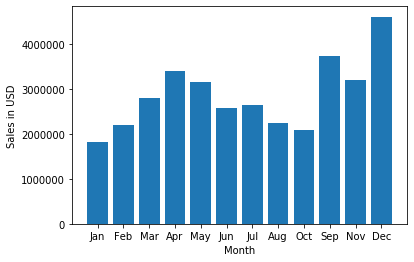

In [14]:
import matplotlib.pyplot as plt

#month = [ month for month, df in all_data.groupby('Month')]                             # for month no to display
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec']       # for month name

plt.bar(month,results)
plt.ylabel('Sales in USD')
plt.xlabel('Month')

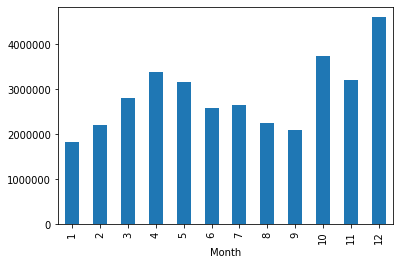

In [15]:
results.plot.bar('Month') # simple plot 

#  December Month had more Sales

## Q2 : What city had the highest No.of Sales?

In [16]:
results1 = all_data.groupby('City').sum()['Sales']
results1

City
 Atlanta (GA)          2.794199e+06
 Austin (TX)           1.818044e+06
 Boston (MA)           3.658628e+06
 Dallas (TX)           2.765374e+06
 Los Angeles (CA)      5.448304e+06
 New York City (NY)    4.661867e+06
 Portland (ME)         4.493214e+05
 Portland (OR)         1.870011e+06
 San Francisco (CA)    8.254744e+06
 Seattle (WA)          2.745046e+06
Name: Sales, dtype: float64

Text(0.5, 0, 'City Name')

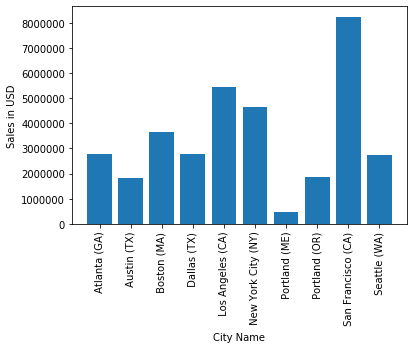

In [17]:
cities = [ city for city, df in all_data.groupby('City')]      #getting values for x-axis in the order of data

plt.bar(cities,results1)                # plotting
plt.xticks(cities, rotation='vertical') # showing every city and text is allign vertical
plt.ylabel('Sales in USD')
plt.xlabel('City Name')

# So the city is 'San Francisco (CA)''

## Q3 : What time should we display advertisements to maximize likelihood of Customers buying product?

Text(0.5, 0, 'Hour')

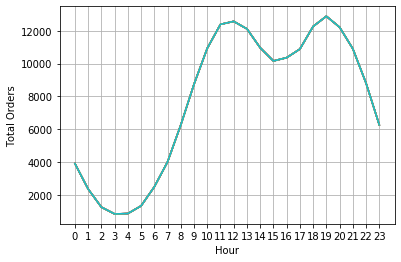

In [18]:
hours = [ hour for hour, df in all_data.groupby('Hour')]     #getting values for x-axis in the order of data

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Total Orders')
plt.xlabel('Hour')

# I recommend between 11am to 12am and 6pm to 7pm.

## Q4: What products are most offten sold together?

In [19]:
     # collecting all DUplicated order IDs => 2 or more products with same ID
df = all_data[all_data['Order ID'].duplicated(keep=False)]

    # joining products with same Order ID we get combined column but repeated rows with same ORDER ID
df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Group']].drop_duplicates()     # droping duplicated rows 

df.head()

C:\Users\suman_cokxlaz\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [21]:
# ('iPhone', 'Lightning Charging Cable') Ordered together most (1002 times)

## Q5 : What product sold the most ? Why do you think it sold the most ?

In [22]:
quantity = all_data.groupby('Product').sum()['Quantity Ordered']
prices = all_data.groupby('Product').mean()['Price Each']

#### Ploting two graph on same x-axis

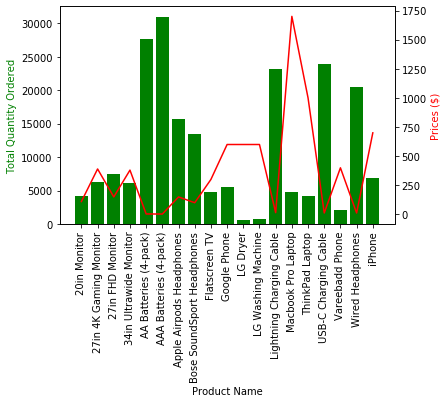

In [23]:
products = [ product for product, df in all_data.groupby('Product')]      #getting values for x-axis in the order of data

fig, ax1 = plt.subplots()     #defining plot on plot

ax2 = ax1.twinx()             #setting x-axis eqyal
ax1.bar(products, quantity, color='g') # plotting total quantity bar chat
ax2.plot(products, prices, 'r-')  # plotting prices

ax1.set_ylabel('Total Quantity Ordered', color='g') 
ax2.set_ylabel('Prices ($)', color='r') 
ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products, rotation='vertical') # showing every product and text is allign vertical

plt.show()

In [24]:
# we'll take the example of AAA Bateries(4-pack), they were sold the most because of low cost and demand/usage of them is more.
# In the case of Macbook pro laptop and LG dryer their cost is more and usage is less.